**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
txt_fname = "region.annotation.tss_essential.coverage.crispri_growth.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.tss_essential.coverage.crispri_growth.tsv 


## Import data

In [4]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
    txt_fname  = "region.annotation.tss_essential.coverage.crispri_growth.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_merge_crispri_growth_tss_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 1428   15

$fcc_astarr_macs_input_union
[1] 1455   15



Chrom,ChromStart,ChromEnd,Region,Group,Label,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label,TSS_Proximity,TSS_Category
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,1068587,1070616,chr1:1068587-1070616,Proximal:Active,Screen:Signif,0.2520571,0.2520571,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Non-Essential
chr1,1324275,1325765,chr1:1324275-1325765,Proximal:Active,Screen:Signif,0.5069515,0.5069515,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Non-Essential
chr1,1573998,1575422,chr1:1573998-1575422,Proximal:Active,Screen:Signif,0.4354863,0.4354863,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Essential


**Check: Counts**

In [5]:
lst = lst_dat_region_merge_crispri_growth_tss_import
lst = lapply(lst, function(dat){
    res = table(
        dat$Assay_Label, 
        dat$Group, 
        dat$Label, 
        dat$TSS_Category, 
        dnn = c("Assay", "Group", "Label", "TSS"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% 
    dplyr::filter(Freq != 0) %>%
    tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay,Group,Label,TSS,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
CRISPRi-Growth,Distal:Active,Screen:Signif,Distal,369,394
CRISPRi-Growth,Proximal:Active,Screen:Signif,Proximal:Essential,503,501
CRISPRi-Growth,Proximal:Active,Screen:Signif,Proximal:Non-Essential,556,560


**Explore: boxplot**

Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_boxplot()`).”


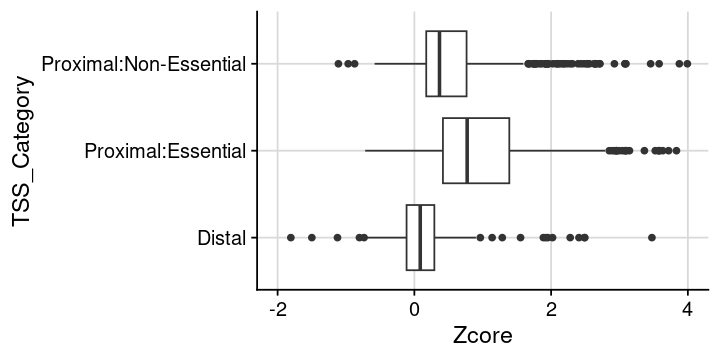

In [6]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_merge_crispri_growth_tss_import
dat = lst[[idx]]

gpt = ggplot(dat, aes(x = Zcore, y = TSS_Category)) +
    geom_boxplot() +
    theme_cowplot() +
    background_grid() +
    xlim(-2, 4)

options(repr.plot.height=3, repr.plot.width=6)
print(gpt)

## Descriptive summary

**Get table**

In [7]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_dat_region_merge_crispri_growth_tss_import
dat = lst[[idx]]

### assign and show
dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1428   15


Chrom,ChromStart,ChromEnd,Region,Group,Label,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label,TSS_Proximity,TSS_Category
chr1,1068587,1070616,chr1:1068587-1070616,Proximal:Active,Screen:Signif,0.2520571,0.2520571,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Non-Essential
chr1,1324275,1325765,chr1:1324275-1325765,Proximal:Active,Screen:Signif,0.5069515,0.5069515,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Non-Essential
chr1,1573998,1575422,chr1:1573998-1575422,Proximal:Active,Screen:Signif,0.4354863,0.4354863,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Essential


**Summary**

In [8]:
dat = dat_region_merge
dat = dat %>% 
    dplyr::group_by(TSS_Category) %>% 
    dplyr::summarise(
        Count  = n(),
        Mean   = mean(Zcore),
        Median = median(Zcore)
    )

fun_display_table(dat)

TSS_Category,Count,Mean,Median
Distal,369,0.1657545,0.0862260
Proximal:Essential,503,1.0577905,0.7743867
Proximal:Non-Essential,556,0.5816283,0.3679809


**Split score vectors by TSS category**

In [9]:
dat = dat_region_merge
lst = split(dat$Zcore, dat$TSS_Category)
vec1 = lst[["Proximal:Essential"]]
vec2 = lst[["Proximal:Non-Essential"]]
vec3 = lst[["Distal"]]

cat("Diff. Median (Prox:E  - Prox:NE)", median(vec1) - median(vec2), "\n")
cat("Diff. Median (Prox:NE - Distal )", median(vec2) - median(vec3), "\n")

Diff. Median (Prox:E  - Prox:NE) 0.4064058 
Diff. Median (Prox:NE - Distal ) 0.2817549 


## Helper function

In [10]:
fun_perm_med_diff_pairwise = function(vec1, vec2){
    ### init
    n1 = length(vec1)
    n2 = length(vec2)

    ### combine and permuted
    vec_comb = c(vec1, vec2)
    permuted = sample(vec_comb)

    ### calculate using permuted vector
    p1  = permuted[1:n1]
    p2  = permuted[(n1 + 1):(n1 + n2)]
    num = median(p1) - median(p2)
    return(num)
}

fun_perm_med_diff_contrast = function(vec1, vec2, vec3){
    ### init
    n1 = length(vec1)
    n2 = length(vec2)
    n3 = length(vec3)

    ### combine and permuted
    vec_comb = c(vec1, vec2, vec3)
    permuted = sample(vec_comb)

    ### calculate using permuted vector
    p1  = permuted[1:n1]
    p2  = permuted[(n1 + 1):(n1 + n2)]
    p3  = permuted[(n1 + n2 + 1):(n1 + n2 + n3)]
    num = (median(p1) - median(p2)) - (median(p2) - median(p3))
    return(num)
}

fun_cliffs_delta = function(x, y) {
    n_x = length(x)
    n_y = length(y)
    cmp = outer(x, y, FUN = function(a, b) sign(a - b))
    num_greater = sum(cmp ==  1)
    num_less    = sum(cmp == -1)
    num_delta   = (num_greater - num_less) / (n_x * n_y)
    return(num_delta)
}

## Perform analyses

### Analaysis: Proximal:Essential > Proximal:Non-Essential

**Test: vec1 > vec2**  
Are the real vec1 values consistently greater than would happen under random groupings?

In [11]:
### init: parameters
set.seed(123)
num_perm = 10000

### run permutation test
num_obs      = median(vec1) - median(vec2)
vec_num_perm = replicate(num_perm, fun_perm_med_diff_pairwise(vec1, vec2))
num_pval     = mean(vec_num_perm >= num_obs)
num_delta    = fun_cliffs_delta(vec1, vec2)

### summarize the results
dat = data.frame(
    "Analysis" = "Proximal:Essential > Proximal:Non-Essential",
    "Num_Perm"      = num_perm,
    "Observed_Diff" = num_obs,
    "Pvalue"        = num_pval,
    "Cliffs_Delta"  = num_delta
)

### assign and show
dat_perm_stats_diff_pe = dat
fun_display_table(dat)

Analysis,Num_Perm,Observed_Diff,Pvalue,Cliffs_Delta
Proximal:Essential > Proximal:Non-Essential,10000,0.4064058,0,0.3881674


### Analaysis: Proximal:Non-Essential > Distal

**Test: vec2 > vec3**

In [12]:
### init: parameters
set.seed(123)
num_perm = 10000

### run permutation test
num_obs      = median(vec2) - median(vec3)
vec_num_perm = replicate(num_perm, fun_perm_med_diff_pairwise(vec2, vec3))
num_pval     = mean(vec_num_perm >= num_obs)
num_delta    = fun_cliffs_delta(vec2, vec3)

### summarize the results
dat = data.frame(
    "Analysis" = "Proximal:Non-Essential > Distal",
    "Num_Perm"      = num_perm,
    "Observed_Diff" = num_obs,
    "Pvalue"        = num_pval,
    "Cliffs_Delta"  = num_delta
)

### assign and show
dat_perm_stats_diff_pne = dat
fun_display_table(dat)

Analysis,Num_Perm,Observed_Diff,Pvalue,Cliffs_Delta
Proximal:Non-Essential > Distal,10000,0.2817549,0,0.4609483


### Analysis: (Proximal:E-Proximal:Non-E) > (Proximal:Non-E-Distal)

**Test: (vec1 - vec2) > (vec2 - vec3)**

In [13]:
### init: parameters
set.seed(123)
num_perm = 10000

### run permutation test
num_obs      = (median(vec1) - median(vec2)) - (median(vec2) - median(vec3))
vec_num_perm = replicate(num_perm, fun_perm_med_diff_contrast(vec1, vec2, vec3))
num_pval     = mean(vec_num_perm >= num_obs)

### estimate cliffs delta for contrast
num_sample = 500
p1 = sample(vec1, size = num_sample, replace = FALSE) # PE
p2 = sample(vec2, size = num_sample, replace = FALSE) # PNE
p3 = sample(vec3, size = num_sample, replace = TRUE)  # Distal (# < 500)
d1 = (p1 - p2)
d2 = (p2 - p3)
num_delta = fun_cliffs_delta(d1, d2)

### summarize the results
dat = data.frame(
    "Analysis" = "(Proximal:Essential-Proximal:Non-Essential) > (Proximal:Non-Essential-Distal)",
    "Num_Perm"      = num_perm,
    "Observed_Diff" = num_obs,
    "Pvalue"        = num_pval,
    "Cliffs_Delta"  = num_delta
)

### assign and show
dat_perm_stats_contrast = dat
fun_display_table(dat)

Analysis,Num_Perm,Observed_Diff,Pvalue,Cliffs_Delta
(Proximal:Essential-Proximal:Non-Essential) > (Proximal:Non-Essential-Distal),10000,0.1246508,0.0272,0.037112


### Combine results

In [14]:
dat_perm_summary = dplyr::bind_rows(
    dat_perm_stats_diff_pe,
    dat_perm_stats_diff_pne,
    dat_perm_stats_contrast
)

fun_display_table(dat_perm_summary)

Analysis,Num_Perm,Observed_Diff,Pvalue,Cliffs_Delta
Proximal:Essential > Proximal:Non-Essential,10000,0.4064058,0.0000,0.3881674
Proximal:Non-Essential > Distal,10000,0.2817549,0.0000,0.4609483
(Proximal:Essential-Proximal:Non-Essential) > (Proximal:Non-Essential-Distal),10000,0.1246508,0.0272,0.0371120


## Export results

In [16]:
### set file directory
txt_folder = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
txt_fname = "result.comparison.tss_essential.coverage.crispri_growth.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### write table
dat = dat_perm_summary
write_tsv(dat, txt_fpath)